# Brincadeirinha

In [29]:
import pickle
import datetime

import numpy as np
import pandas as pd


from matplotlib import pyplot
from prophet    import Prophet

from IPython.display        import Image
from IPython.core.display   import HTML

In [2]:
df = pd.read_csv("E:\__temp__\AzureUsage-1ano.csv")
df.sample()

,SubscriptionName,SubscriptionGuid,Date,ResourceGuid,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
3883,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,12/4/2023,3da19ca3-6007-4a29-89ea-cab10c2010ed,Virtual Machines,Dv3/DSv3 Series,US East,D4 v3/D4s v3,24.0,4.608


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
#filtro_data = (df["Date"])
#filtro_service_name = df['ServiceName'] == "Functions"
#filtro_service_resource = df['ServiceResource'] == "Premium vCPU Duration"

df_aux = df.loc[:, ["Date", "Cost"]].groupby("Date").sum().reset_index()

In [10]:
df_aux.rename(columns = {"Date":"ds", "Cost":"y"}, inplace = True)

In [11]:
df_aux.sample(5)

,ds,y
182,2024-03-17,5.255864
357,2024-09-08,18.856781
66,2023-11-22,6.215059
188,2024-03-23,5.299830
195,2024-03-30,5.265039


In [24]:
m = Prophet()
m.fit(df_aux)
future = m.make_future_dataframe(periods=90)
future.tail()

18:47:40 - cmdstanpy - INFO - Chain [1] start processing
18:47:40 - cmdstanpy - INFO - Chain [1] done processing


,ds
452,2024-12-12
453,2024-12-13
454,2024-12-14
455,2024-12-15
456,2024-12-16


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-09-17,6.235747,1.718894,10.372973
1,2023-09-18,6.212258,2.063108,10.525765
2,2023-09-19,6.029523,1.894400,10.213496
3,2023-09-20,5.801847,1.496513,10.101780
4,2023-09-21,5.751770,1.594373,9.808107
...,...,...,...,...
452,2024-12-12,13.109324,9.107265,17.506628
453,2024-12-13,13.143466,8.887660,17.346126
454,2024-12-14,13.261674,9.287812,17.672843
455,2024-12-15,13.651933,9.599034,18.032739


In [26]:
ds_future = forecast

In [27]:
futuro = ds_future.loc[ds_future["ds"] > "2024-09-17",\
        ['ds', 'yhat', 'yhat_lower', 'yhat_upper']] \
        .groupby("ds").sum().reset_index()
futuro

,ds,yhat,yhat_lower,yhat_upper
0,2024-09-18,10.379751,6.038495,14.617950
1,2024-09-19,10.372042,6.333013,14.437805
2,2024-09-20,10.406184,6.256477,14.786188
3,2024-09-21,10.524391,6.451115,14.671974
4,2024-09-22,10.914651,6.659715,14.919613
...,...,...,...,...
85,2024-12-12,13.109324,9.107265,17.506628
86,2024-12-13,13.143466,8.887660,17.346126
87,2024-12-14,13.261674,9.287812,17.672843
88,2024-12-15,13.651933,9.599034,18.032739


In [28]:
futuro['yhat'].sum()

1077.2241581634785

e:\3_recursos\2_area\profissional\cursos\v3119\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\3_recursos\2_area\profissional\cursos\v3119\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

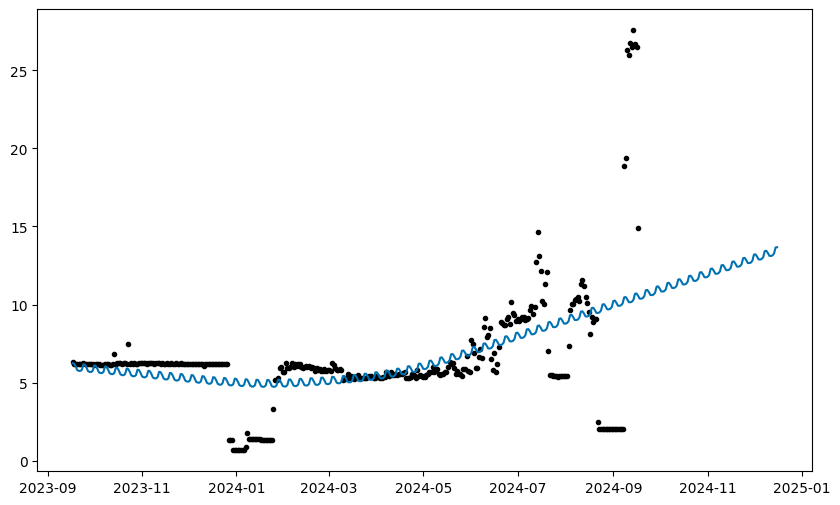

In [30]:
fig1 = m.plot(forecast)

e:\3_recursos\2_area\profissional\cursos\v3119\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

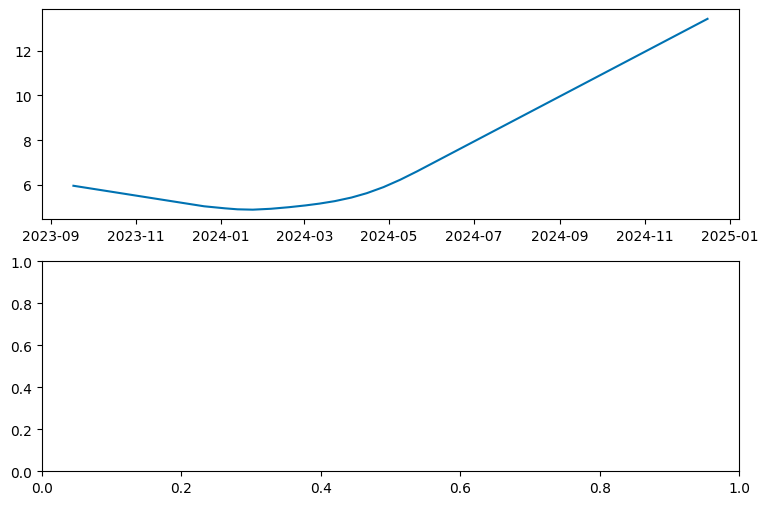

In [31]:
fig2 = m.plot_components(forecast)